<a id='top'></a><a name='top'></a>
# Chapter 1: Gaining Early Insights with Textual Data

Book: [Blueprints for Text Analysis Using Python](https://www.oreilly.com/library/view/blueprints-for-text/9781492074076/)

Repo: https://github.com/blueprints-for-text-analytics-python/blueprints-text

* [Introduction](#introduction)
* [1.0 Imports and Setup](#1.0)
* [1.1 Exploratory Data Analysis](#1.1)
* [1.2 Introducing the Dataset](#1.2)
* [1.3 Blueprint: Getting an Overview of the Data with Pandas](#1.3)
    - [1.3.1 Calculating Summary Statistics for Columns](#1.3.1)
    - [1.3.2 Checking for Missing Data](#1.3.2)
    - [1.3.3 Plotting Value Distributions](#1.3.3)
    - [1.3.4 Comparing Value Distributions Across Categories](#1.3.4)
    - [1.3.5 Visualizing Developmentse Over Time](#1.3.5)
* [1.4 Blueprint: Building a Simple Text Preprocessing Pipeline](#1.4)
    - [1.4.1 Performing Tokenization with Regular Expressions](#1.4.1)
    - [1.4.2 Treating Stop Words](#1.4.2)
    - [1.4.3 Processing a Pipeline with One Line of Code](#1.4.3)
* [1.5 Blueprint: Blueprints for Word Frequency Analysis](#1.5)
    - [1.5.1 Blueprint: Counting Words with a Counter](#1.5.1)
    - [1.5.2 Blueprint: Creating a Frequency Diagram](#1.5.2)
    - [1.5.3 Blueprint: Creating Word Clouds](#1.5.3)
    - [1.5.4 Blueprint: Ranking with TF-IDF](#1.5.4)
* [1.6 Blueprint: Finding a Keyword-in-Context](#1.6)
* [1.7 Blueprint: Analyzing N-Grams](#1.7)
* [1.8 Blueprint: Comparing Frequencies Across Time Intervals and Categories](#1.8)
    - [1.8.1 Creating Frequency Timelines](#1.8.1)
    - [1.8.2 Creating Frequency Heatmaps](#1.8.2)

---
<a name='introduction'></a><a id='introduction'></a>
# Introduction
<a href="#top">[back to top]</a>

### Dataset

* UN General Debate dataset: [script](#un-general-debates-blueprint.csv.gz), [source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y)
    - This consists of 7,507 speeches held annually at the UN, from 1970 to 2016. 


### Explore

* Statistical analysis of text.
* Analyzing categorical metadata.
* Word frequency analysis and visualization.
* Pandas for data analysis.
* How to tokenize text.
* How to filter stop words.
* How to analyze textual content with frequency diagrams and word clouds.
* TF-IDF weighting concept.

---
<a name='1.0'></a><a id='1.0'></a>
# 1.0 Imports and Setup
<a href="#top">[back to top]</a>

In [1]:
# Start with clean project
# !rm -f *.py
# !rm -f *.txt
# !rm -f *.gz

In [2]:
req_file = "requirements_01.txt"

In [15]:
%%writefile {req_file}
isort
textacy
watermark

Overwriting requirements_01.txt


In [16]:
import sys
IS_COLAB = 'google.colab' in sys.modules

if IS_COLAB:
    print("Installing packages")
    !pip install --upgrade --quiet -r {req_file}
else:
    print("Running locally.")

Running locally.


In [17]:
%%writefile imports.py
import locale
import pprint
import random
import warnings
from collections import Counter

import nltk
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
import textacy
from matplotlib import pyplot as plt
from textacy.extract.kwic import keyword_in_context
from tqdm.auto import tqdm
from watermark import watermark
from wordcloud import WordCloud

Overwriting imports.py


In [18]:
!isort imports.py
!cat imports.py

import locale
import pprint
import random
import warnings
from collections import Counter

import nltk
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
import textacy
from matplotlib import pyplot as plt
from textacy.extract.kwic import keyword_in_context
from tqdm.auto import tqdm
from watermark import watermark
from wordcloud import WordCloud


In [19]:
import locale
import pprint
import random
import warnings
from collections import Counter

import nltk
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
import textacy
from matplotlib import pyplot as plt
from textacy.extract.kwic import keyword_in_context
from tqdm.auto import tqdm
from watermark import watermark
from wordcloud import WordCloud

In [20]:
def HR():
    print("-"*40)
    
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding
warnings.filterwarnings('ignore')
BASE_DIR = '.'
sns.set_style("darkgrid")
tqdm.pandas(desc="progress-bar")
pp = pprint.PrettyPrinter(indent=4)
random.seed(23)

print(watermark(iversions=True,globals_=globals(),python=True,machine=True))

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.18.1

Compiler    : Clang 14.0.0 (clang-1400.0.29.202)
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

numpy     : 1.26.0
regex     : 2024.7.24
pandas    : 2.2.2
matplotlib: 3.9.2
nltk      : 3.8.1
textacy   : 0.13.0
seaborn   : 0.13.2
sys       : 3.11.5 (main, Jan 16 2024, 17:25:53) [Clang 14.0.0 (clang-1400.0.29.202)]



In [21]:
print(textacy.__version__)
assert textacy.__version__ >= '0.12.0'

0.13.0


In [22]:
# Misc downloads
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/gpb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---
<a name='1.1'></a><a id='1.1'></a>
# 1.1  Exploratory Data Analysis
<a href="#top">[back to top]</a>

This is the process of systematically examining data on an aggregated level. Typical methods include summary statistics for numerical features, as well as frequency counts for categorial features. Histograms and box plots can illustrate the distribution of values, and time-series plots will show their evolution.

---
<a name='1.2'></a><a id='1.2'></a>
# 1.2  Introducing the Dataset
<a href="#top">[back to top]</a>

<a id='un-general-debates-blueprint.csv.gz'></a><a name='un-general-debates-blueprint.csv.gz'></a>
### Dataset: un-general-debates-blueprint.csv.gz
<a href="#top">[back to top]</a>

In [23]:
# Skip download if file already exists.
file = "un-general-debates-blueprint.csv.gz"
!wget -nc https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/un-general-debates/un-general-debates-blueprint.csv.gz
!ls -l {file}

ファイル `un-general-debates-blueprint.csv.gz' はすでに存在するので、取得しません。

-rw-r--r--  1 gpb  staff  44841131 11  2 13:29 un-general-debates-blueprint.csv.gz


In [24]:
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [25]:
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to y..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, ..."


### Sample of dataset

A quick trick to select a sample of the Pandas dataset is to use it's `sample` function. This selects a random sample of n% of records.

In [26]:
df_sample = df.sample(frac=0.1)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 7378 to 588
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       751 non-null    int64 
 1   year          751 non-null    int64 
 2   country       751 non-null    object
 3   country_name  751 non-null    object
 4   speaker       746 non-null    object
 5   position      436 non-null    object
 6   text          751 non-null    object
dtypes: int64(2), object(5)
memory usage: 46.9+ KB


---
<a name='1.3'></a><a id='1.3'></a>
# 1.3 Blueprint: Getting an Overview of the Data with Pandas
<a href="#top">[back to top]</a>

Here, we use only the metadata and record counts to explore data distribution and quality. We will examine the actual textual content later. 

The workflow here is:

1. Calculate summary statistics.
2. Check for missing values.
3. Plot distributions of interesting attributes.
4. Compare distributions across categories.
5. Visualize developments over time.

<a name='1.3.1'></a><a id='1.3.1'></a>
## 1.3.1 Calculating Summary Statistics for Columns
<a href="#top">[back to top]</a>

### Create summary for numerical columns.

In [27]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


### Create summary for nonnumerical columns.

In [28]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


<a name='1.3.2'></a><a id='1.3.2'></a>
## 1.3.2 Checking for Missing Data
<a href="#top">[back to top]</a>

In [29]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [30]:
df['speaker'].fillna('unknown', inplace=True)

In [31]:
df['speaker'].nunique()

5429

In [32]:
(df['speaker']=='unknown').sum()

27

We can see that some existing values are problematic because the same speaker's name can be spelled differently.

Any analysis on speaker names would produce the wrong results unless we resolve these ambiguities. Here, we should check the distinct values of categorical attributes. 

In [33]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64

<a name='1.3.3'></a><a id='1.3.3'></a>
## 1.3.3 Plotting Value Distributions
<a href="#top">[back to top]</a>

We can use Panda's box-plot to visualize the five-number summary of a numerical distribution.

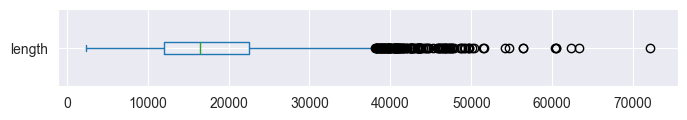

In [34]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))
plt.show()

We can check the skewness of the distribution via a histogram.

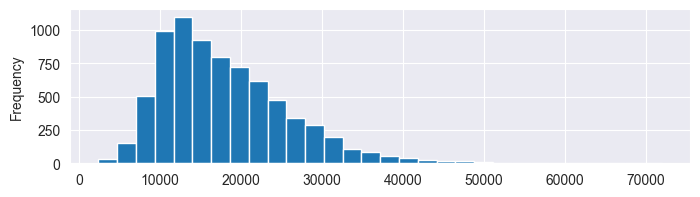

In [35]:
df['length'].plot(kind='hist', bins=30, figsize=(8,2))
plt.show()

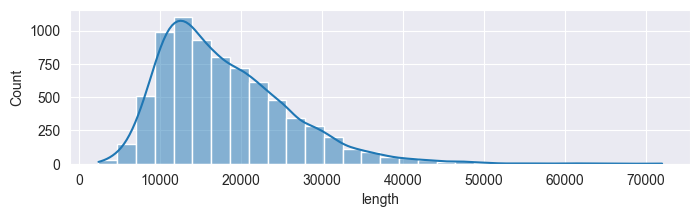

In [36]:
# Seaborn plot with gaussian kernel density estimate
plt.figure(figsize=(8, 2))
sns.histplot(df["length"], bins=30, kde=True)
plt.show()

<a name='1.3.4'></a><a id='1.3.4'></a>
## 1.3.4 Comparing Value Distributions Across Categories
<a href="#top">[back to top]</a>

Peculiarities in the data are often visible when different subsets of data are examined. We can easily compare distributions across different categories via Seaborn's `catplot`.

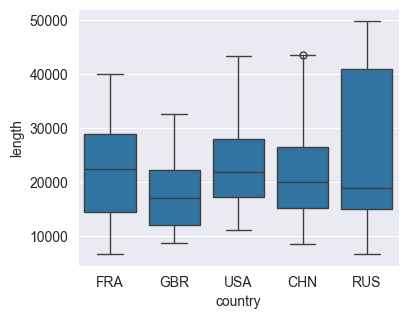

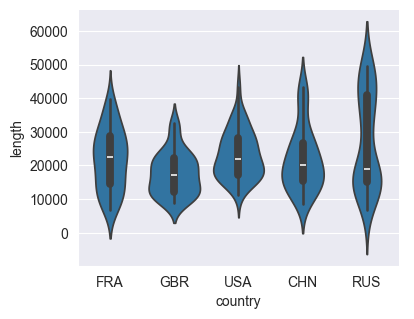

In [37]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###

g = sns.catplot(data=df[where], x="country", y="length", kind='violin')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###

plt.show()

<a name='1.3.5'></a><a id='1.3.5'></a>
## 1.3.5 Visualizing Developments over Time
<a href="#top">[back to top]</a>

If the data contains date or time attributes, it is always interesting to visualize developments within the data over time. 

Analyze the number of speeches per year.

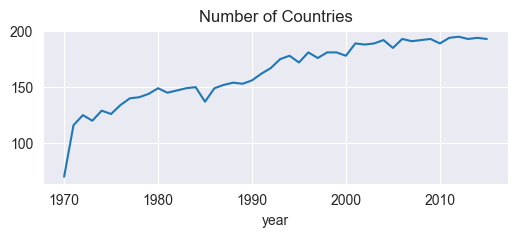

In [38]:
df.groupby('year').size().plot(title="Number of Countries", figsize=(6,2))
plt.show()

Calculate the average speech length over time.

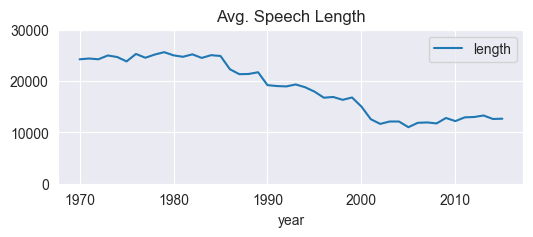

In [39]:
(
    df.groupby('year')
    .agg({'length': 'mean'})
    .plot(title="Avg. Speech Length", ylim=(0,30000), figsize=(6,2))
)

plt.show()

---
<a name='1.4'></a><a id='1.4'></a>
# 1.4 Blueprint: Building a Simple Text Preprocessing Pipeline
<a href="#top">[back to top]</a>

We dig deeper into the actual content and explore frequent words in different subsets or time periods. For this, we prepare text for quick first analysis, consisting of a simple sequence of steps. This sequence is called a *pipeline*, and will have three steps here:

1. Case-folding into lowercase.
2. Tokenization.
3. Stop word removal.

For now, we will build our own tokenizer based on regex, and show how to use an arbitrary stop word list.

<a name='1.4.1'></a><a id='1.4.1'></a>
## 1.4.1 Performing Tokenization with Regular Expressions
<a href="#top">[back to top]</a>

Tokenization is the process of extracting words from a sequence of characters.

We use `\p{L}` to match all Unicode letters. We need to use the `regex` library instead of `re` to work with POSIX character classes. 

In [41]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


<a name='1.4.2'></a><a id='1.4.2'></a>
## 1.4.2 Treating Stop Words
<a href="#top">[back to top]</a>

The most frequent words in text are common words such as determiners, auxiliary verbs, pronouns, adverbs, etc. These "stop words" usually don't carry much information, and hide interesting content because of their high frequencies. So, stop words are often removed before data analysis or model training. 

Here we use NLTK's list of stop words, but we could use any list of stop words as a filter. For fast lookup, we convert the list to a set, since they have nearly constant lookup time.

In addition to or instead of a fixed list of stop words, we can also treat every word that appears in more than 80% of the documents as a stop word, since such common words make it more difficult to distinguish content. This is what the `max_df` parameter of scikit-learn vectorizers does. We can also filter words based on the part-of-speech.

In [46]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [47]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [48]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [49]:
print(stopwords)

{'he', "that'll", 'were', 'after', 'is', 'who', 'don', 'over', 'm', 'being', "mustn't", 'how', 'so', 'o', 'down', "aren't", 'whom', 'll', 'only', 'yourself', 'didn', 'they', 'be', 'out', "wasn't", 'on', 'will', 'hers', 'both', 'y', 'by', 'now', 'are', 'her', "don't", "you've", 'should', 'my', 'mustn', 'doing', 'just', 'also', 'did', 'herself', 'at', 'wouldn', 'must', 'himself', 'each', 'the', 'shan', 'what', 'most', 'such', "shouldn't", 'of', 'hadn', 'do', 'theirs', 'and', 'having', 'all', 'you', 'before', 'weren', "you're", "you'll", 'their', 'these', 'here', 'then', 'that', 'shouldn', 'those', 'into', 'me', 'your', 'more', 'had', 'again', 'not', 'ourselves', 'myself', 'off', 'or', 'same', 'yourselves', 'isn', 'been', "hadn't", "wouldn't", 't', "hasn't", "shan't", 'own', 'than', 'his', 'until', "needn't", 'but', 'to', 'a', 'below', 'we', 'doesn', 'as', 'she', 'him', 'an', 'very', 'hasn', "it's", 'too', 'ain', "didn't", 'mightn', "weren't", 'yours', 'haven', "haven't", "mightn't", 'fro

<a name='1.4.3'></a><a id='1.4.3'></a>
## 1.4.3 Processing a Pipeline with One Line of Code
<a href="#top">[back to top]</a>

Create a new column in the `DataFrame` that contains the lowercased, tokenized text without stop words. 

We use the Pandas `apply` or tdqm-modified `progress_apply` since it allows us to pass additional parameters, which is here `pipeline`.

In [50]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [51]:
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

In [52]:
# Before preprocessing
df['text'].head()

0    33: May I first convey to our President the co...
1    177.\t : It is a fortunate coincidence that pr...
2    100.\t  It is a pleasure for me to extend to y...
3    155.\t  May I begin by expressing to Ambassado...
4    176. No doubt each of us, before coming up to ...
Name: text, dtype: object

In [54]:
# After prepreprocessing
df['tokens'].head()

0    [may, first, convey, president, congratulation...
1    [fortunate, coincidence, precisely, time, unit...
2    [pleasure, extend, mr, president, warmest, con...
3    [may, begin, expressing, ambassador, hambro, b...
4    [doubt, us, coming, rostrum, wonders, usefulne...
Name: tokens, dtype: object

We add another column containing the length of the token list, for summarization later.

In [55]:
df['num_tokens'] = df['tokens'].progress_map(len)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

In [56]:
df['num_tokens'].head()

0    4125
1    2327
2    2545
3    2135
4    2025
Name: num_tokens, dtype: int64

In [57]:
# Double-check length of tokens
print(len(df['tokens'][0]))

4125


---
<a name='1.5'></a><a id='1.5'></a>
# 1.5 Blueprint: Blueprints for Word Frequency Analysis
<a href="#top">[back to top]</a>

Frequently used words and phrases can give us some basic understanding of the discussed topics. However, word frequency analysis ignores the order and context of words. This is the concept of the bag-of-words model. The original arrangement of text is lost, and only the frequency of terms is represented. This model can do well for classification and topic modeling, but does not work well for more complex tasks such as sentiment analysis. 

<a name='1.5.1'></a><a id='1.5.1'></a>
## 1.5.1 Blueprint: Counting Words with a Counter
<a href="#top">[back to top]</a>

In [58]:
tokens = tokenize("She likes my cats and my cats like my sofa.")
counter = Counter(tokens)
pp.pprint(counter)

Counter({   'my': 3,
            'cats': 2,
            'She': 1,
            'likes': 1,
            'and': 1,
            'like': 1,
            'sofa': 1})


In [59]:
more_tokens = tokenize("She likes dogs and cats.")
counter.update(more_tokens)
pp.pprint(counter)

Counter({   'my': 3,
            'cats': 3,
            'She': 2,
            'likes': 2,
            'and': 2,
            'like': 1,
            'sofa': 1,
            'dogs': 1})


To find the most frequent words within a corpus, we need to create a counter from the list of all words in all documents. The most efficient method is to call the `update` function of the counter object for each single document.

We put `counter.update` in the `map` function. 

In [60]:
%%time
counter = Counter()
_ = df['tokens'].progress_map(counter.update)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

CPU times: user 3.12 s, sys: 110 ms, total: 3.23 s
Wall time: 3.45 s


In [61]:
pp.pprint(len(counter))
HR()
pp.pprint(counter.most_common(5))

68394
----------------------------------------
[   ('nations', 124508),
    ('united', 120763),
    ('international', 117223),
    ('world', 89421),
    ('countries', 85734)]


For further processing and analysis, it is more convenient to transform the counter into a Pandas DataFrame. 

In [62]:
%%time
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # Process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # Create counter and run through all data
    counter = Counter()
    df[column].progress_map(update)

    # Transform counter into DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

freq_df = count_words(df)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

CPU times: user 2.92 s, sys: 109 ms, total: 3.03 s
Wall time: 3.22 s


In [63]:
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [64]:
freq_df.tail(5)

,freq
token,
unrewarding,2
israel-egypt,2
non-jews,2
shouf,2
al-baydhah,2


If we don't want to use precomputed tokens, we could also tokenize the text on the fly with a custom preprocessing fuction as the third parameter. Here we generate and count all words with 10 or more characters as an on-the-fly tokenization.

In [66]:
# Top words with 10+ characters
count_words(df, 
            column='text', 
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177


<a name='1.5.2'></a><a id='1.5.2'></a>
## 1.5.2 Blueprint: Creating a Frequency Diagram
<a href="#top">[back to top]</a>

We use horizontal bars (`barh`) for word frequencies since it improves readability, with words appearing horizontally on the y-axis. The y-axis is then inverted to place the top words at the top of the chart.

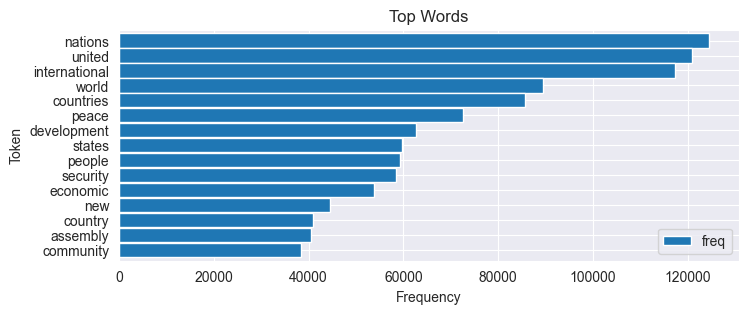

In [67]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,3))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')
plt.show()

For comparison, this is a less-readable bar chart using default settings.

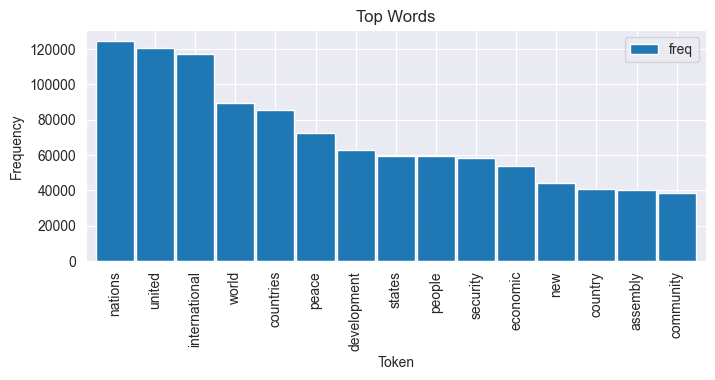

In [68]:
ax = freq_df.head(15).plot(kind='bar', width=0.95, figsize=(8,3))
ax.set(xlabel='Token', ylabel='Frequency', title='Top Words')
plt.show()

<a name='1.5.3'></a><a id='1.5.3'></a>
## 1.5.3 Blueprint: Creating Word Clouds
<a href="#top">[back to top]</a>

Word clouds visualize frequencies by different font sizes. 

To work on a single text, we can use `wordcloud`. The simplest way to use it is instantiate a word cloud object with maximum number of words and a stop word list.

In [69]:
# Make sure our basic query selects the correct record.
df.query("year==2015 and country=='USA'")

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7495,70,2015,USA,United States,Barack Obama,President,Seventy years after the founding of the United...,28300,"[seventy, years, founding, united, nations, wo...",2374


In [71]:
# Extend the query to select only text from this record.
text = df.query("year==2015 and country=='USA'")['text'].values[0]

# Show a sample
text[:300]

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations'

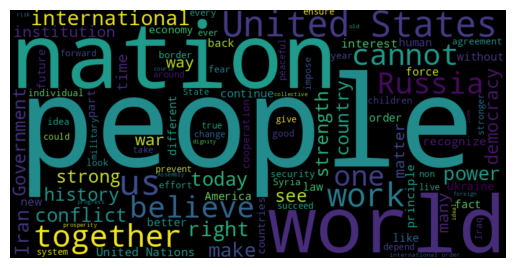

In [72]:
# Use the result in a wordcloud
wc = WordCloud(width=800, height=400, max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

For a large set of documents, it is faster to first create a frequency counter, and then use the function `generate_from_frequencies`.

In [73]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(
        width=800, 
        height=400, 
        background_color="black", 
        colormap="Paired", 
        max_font_size=150, 
        max_words=max_words
    )
    
    # Convert data frame into dict.
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # Filter stop words in frequency counter.
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

Create word clouds for all 2015 speeches. We create a graph including all words, and a graph filtering out the top-50 most frequent words.

progress-bar:   0%|          | 0/193 [00:00<?, ?it/s]

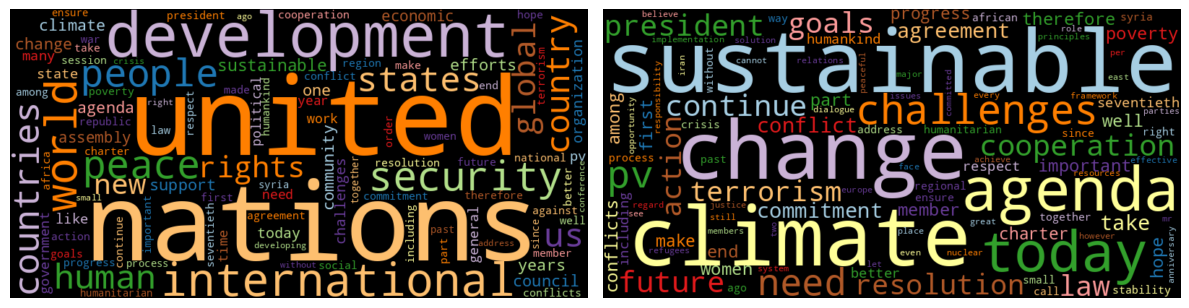

In [74]:
freq_2015_df = count_words(df[df['year']==2015])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)

wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
plt.tight_layout()

<a name='1.5.4'></a><a id='1.5.4'></a>
## 1.5.4 Blueprint: Ranking with TF-IDF
<a href="#top">[back to top]</a>

Visualizing the most frequent words usually does not reveal much insight. Even if stop words are removed, the most common words are usually domain-specific terms that are quite similar in any subset (slice) of the data.

Instead, we want to give more importance to words that appear more frequently than "usual" in a given slice. In other words, we want to highlight words whose actual word frequency in a slice is **higher than their total probability would suggest**. This is a measure of the **"suprise"** factor of a word, taken from the concept of entropy.

A simple but effective algorithm we can use here is to complement the term frequency with the inverse document frequency, known as TF-IDF.

In [75]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # Count tokens
    counter = Counter()
    df[column].progress_map(update)

    # Create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
        
    return idf_df

In [76]:
idf_df = compute_idf(df)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

In [77]:
idf_df.head(1)

,df,idf
token,,
resolute,714,2.452708


In [78]:
# Not in book: sample of IDF values. High IDF means rare (interesting) term
idf_df.sample(5)

,df,idf
token,,
legion,22,5.932549
amended,80,4.641565
manufacturers,34,5.497231
uplands,2,8.330444
uniforms,14,6.384534


In [79]:
freq_df = count_words(df)
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df['tfidf']

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

token
nations          12649.986284
united           12285.608632
international    12364.276226
world             9503.708982
countries        10888.485986
                     ...     
unrewarding         16.660888
israel-egypt        16.660888
non-jews            16.660888
shouf               16.660888
al-baydhah                NaN
Name: tfidf, Length: 40508, dtype: float64

In [80]:
# Not in book: for more data: joining is faster
freq_df = count_words(df)
freq_df = freq_df.join(idf_df)
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']
freq_df['tfidf']

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

token
nations          12649.986284
united           12285.608632
international    12364.276226
world             9503.708982
countries        10888.485986
                     ...     
unrewarding         16.660888
israel-egypt        16.660888
non-jews            16.660888
shouf               16.660888
al-baydhah                NaN
Name: tfidf, Length: 40508, dtype: float64

progress-bar:   0%|          | 0/70 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/193 [00:00<?, ?it/s]

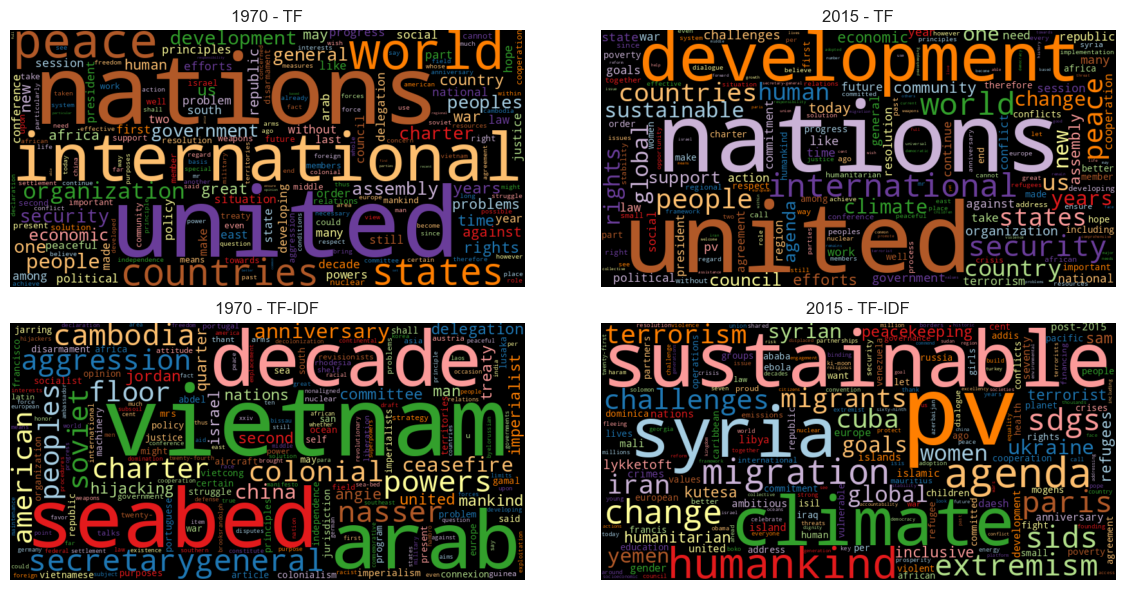

In [81]:
freq_1970 = count_words(df[df['year'] == 1970])
freq_2015 = count_words(df[df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

plt.figure(figsize=(12,6)) ###

#wordcloud(freq_df['freq'], title='All years', subplot=(1,3,1))
plt.subplot(2,2,1)###

wordcloud(freq_1970['freq'], title='1970 - TF', stopwords=['twenty-fifth', 'twenty-five'])
plt.subplot(2,2,2)###

wordcloud(freq_2015['freq'], title='2015 - TF', stopwords=['seventieth'])
plt.subplot(2,2,3)###

wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF', stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])
plt.subplot(2,2,4)###

wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF', stopwords=['seventieth'])

plt.tight_layout()

The most common words are almost identical in 1970 and 2015. 

However, we can see that TF-IDF weighted visualizations (1970 TF-IDF and 2015 TF-IDF) emphasize the differences of political topics.

---
<a name='1.6'></a><a id='1.6'></a>
# 1.6 Blueprint: Finding a Keyword-in-Context
<a href="#top">[back to top]</a>

The keyword-in-context (KWIC) analysis helps explain why a certain term appears prominently. KWIC produces a list of text fragments of equal length, showing the left and right context of a keyword.

This KWIC analysis is implemented in both NLTK and textacy. Here we will use the textacy KWIC function, since it is fast and works on untokenized text.

**Note:** textacy's API had major changes from version 0.10.1 (as used in the book) to 0.11.  
Here, `textacy.text_utils.KWIC` became `textacy.extract.kwic.keyword_in_context` (see [textacy documentation](https://textacy.readthedocs.io/en/latest/api_reference/extract.html#module-textacy.extract.kwic)).




In [82]:
textacy.extract.kwic.keyword_in_context?

Signature:
textacy.extract.kwic.keyword_in_context(
    doc: 'Doc | str',
    keyword: 'str | Pattern',
    *,
    ignore_case: 'bool' = True,
    window_width: 'int' = 50,
    pad_context: 'bool' = False,
) -> 'Iterable[tuple[str, str, str]]'
Docstring:
Search for ``keyword`` matches in ``doc`` via regular expression and yield matches
along with ``window_width`` characters of context before and after occurrence.

Args:
    doc: spaCy ``Doc`` or raw text in which to search for ``keyword``. If a ``Doc``,
        constituent text is grabbed via :attr:`spacy.tokens.Doc.text`. Note that
        spaCy annotations aren't used at all here, they're just a convenient
        owner of document text.
    keyword: String or regular expression pattern defining the keyword(s) to match.
        Typically, this is a single word or short phrase ("spam", "spam and eggs"),
        but to account for variations, use regex (``r"[Ss]pam (and|&) [Ee]ggs?"``),
        optionally compiled (``re.compile(r"[Ss]p

In [83]:
# Assuming textacy > 0.11.x
def KWIC(*args, **kwargs):
    # Call keyword_in_context with all params except 'print_only'
    return keyword_in_context(
        *args, 
        **{kw: arg for kw, arg in kwargs.items() if kw != 'print_only'}
    )

In [84]:
def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(
            text, 
            keyword, 
            ignore_case=True, 
            window_width=window, 
            print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + f"contexts for '{keyword}':")
        print()
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ sample[1]+'  '+ re.sub(r'[\n\t]', ' ', sample[2]))

In [85]:
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

progress-bar:   0%|          | 0/193 [00:00<?, ?it/s]

5 random samples out of 73 contexts for 'sdgs':

 stress that for the newly adopted   SDGs   to be truly global, they must be p
, to ensure the realization of the   SDGs  . The Commonwealth of Dominica is t
iven the ambition reflected in the   SDGs  , we surely will need to scale up t
ited Nations requirement. With the   SDGs  , we have the opportunity to improv
velop to effectively implement the   SDGs  . Togo, whose economy is largely de


In [86]:
# Check the previous year, 2014
kwic(df[df['year'] == 2014]['text'], 'sdgs', print_samples=5)

progress-bar:   0%|          | 0/194 [00:00<?, ?it/s]

5 random samples out of 28 contexts for 'sdgs':

. We in Africa expect that the new   SDGs   will be  people-centred. They must
 crafted and delicately   balanced   SDGs  , accompanied by 169 targets. A mea
ions of the  world. Indeed, if the   SDGs   are to drive development and  also
he sustainable development goals  (  SDGs  ). Those goals represent the centra
of sustainable development  goals (  SDGs  ).  We note that this is a matter f


---
<a name='1.7'></a><a id='1.7'></a>
# 1.7 Blueprint: Analyzing N-Grams
<a href="#top">[back to top]</a>

It can help to reintroduce word-context by extending frequency analysis from single words to short sequences of two or three words. 

We are looking for two types of word sequences:

1. Compounds: Combination of two or more words with a specific meaning (eg 'earthquake', 'climate change')
2. Collations: Words that are frequently used together (eg 'red carpet', 'united nations')

In [87]:
# Produce a set of n-grams for a sequence of tokens.
def ngrams_simple(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [88]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
tokens

['the', 'visible', 'manifestation', 'of', 'the', 'global', 'climate', 'change']

In [89]:
# Show n-grams
print("|".join(ngrams_simple(tokens, 2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


In [90]:
# Build n-grams, then filter out those containing stop words
def ngrams_no_sw(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

In [91]:
# Show n-grams without stop words
print("Bigrams:\t", "|".join(ngrams_no_sw(tokens, 2, stopwords=stopwords)))
print("Trigrams:\t", "|".join(ngrams_no_sw(tokens, 3, stopwords=stopwords)))

Bigrams:	 visible manifestation|global climate|climate change
Trigrams:	 global climate change


Add a column containing all bigrams to our DataFrame, and apply the word count pattern to determine the top-five bigrams.

In [92]:
df['bigrams'] = (
    df['text']
        .progress_apply(prepare, pipeline=[str.lower, tokenize])
        .progress_apply(ngrams_no_sw, n=2, stopwords=stopwords)
)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

In [93]:
df['text'].head(3)

0    33: May I first convey to our President the co...
1    177.\t : It is a fortunate coincidence that pr...
2    100.\t  It is a pleasure for me to extend to y...
Name: text, dtype: object

In [94]:
df['bigrams'].head(3)

0    [first convey, albanian delegation, twenty-fif...
1    [fortunate coincidence, united nations, first ...
2    [mr president, warmest congratulations, austra...
Name: bigrams, dtype: object

In [95]:
count_words(df, 'bigrams').head(5)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


### TF-IDF with bigrams

Next, we can extend our TF-IDF-based unigram analysis to include bigrams. 

We add the bigram IDF values, compute the TF-IDF-weighted bigram frequencies for all speeches from 2015, and generate a word cloud from the resulting DataFrame. 

In [96]:
idf_df = compute_idf(df) ### re-initialize to be safe

# Concatenate existing IDF data frame with bigram IDFs
idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)])

freq_df = count_words(df[df['year'] == 2015], 'bigrams')
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/193 [00:00<?, ?it/s]

---
Here, we create and weighta all n-grams that do not contain stop words. 

The word cloud on the left shows that *climate change* was a frequent bigram in 2015.

On the right, we can examine the bigrams containing *climate* only. For this, we use a text filter to only include bigrams containing *climate*.

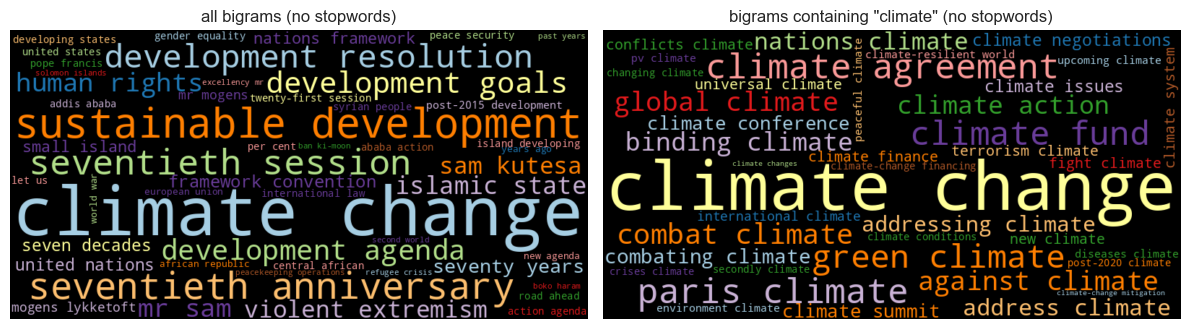

In [97]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
wordcloud(freq_df['tfidf'], title='all bigrams (no stopwords)', max_words=50)

plt.subplot(1,2,2)
where = freq_df.index.str.contains('climate') # Extra step to filter for `climate`
wordcloud(freq_df[where]['freq'], title='bigrams containing "climate" (no stopwords)', max_words=50)

plt.tight_layout()

---
<a name='1.8'></a><a id='1.8'></a>
# 1.8 Blueprint: Comparing Frequencies Across Time Intervals and Categories
<a href="#top">[back to top]</a>

We want to track the development of a number of search terms over time, such as seen in Google Trends.

This kind of trend analysis computes frequencies by day and visualizes them with a line chart. We want to track the development of certain keywords over the course of the years in our UN Debates dataset to get an idea about the growing or shrinking importance of topics such as climate change, terrorism, or migration.

<a name='1.8.1'></a><a id='1.8.1'></a>
## 1.8.1 Creating Frequency Timelines
<a href="#top">[back to top]</a>

We can calculate the frequencies of given keywords per document and then aggregate those frequencies via Panda's `groupby` function.

This is essentially a simple count-vectorizer for keywords.

In [98]:
# Extract counts of given keywords from a list of tokens.
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [99]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


If we apply this function to each document in our DataFrame, we get a matrix of counts.

In [100]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].progress_apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

In [101]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

In [102]:
# Check returned DataFrame
pd.options.display.max_rows = 4
freq_df

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
...,...,...,...,...
2014,144,404,654,129
2015,246,378,662,148


The resulting DataFrame is already prepared for plotting since we have one data series per keyword.

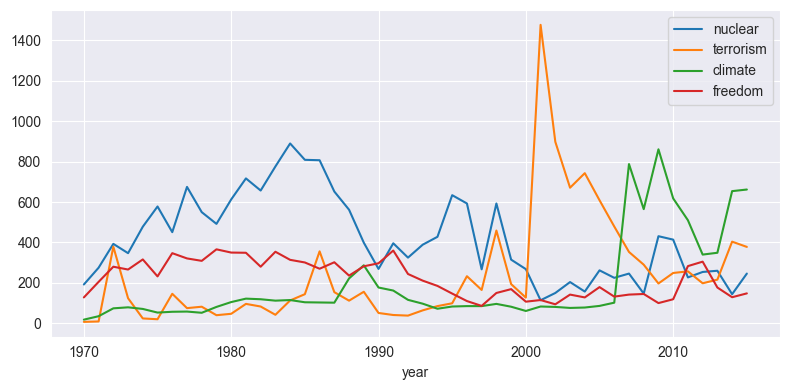

In [103]:
freq_df.plot(kind='line', figsize=(8, 4))
plt.tight_layout()

Analyzing mentions of 'climate' before 1980 via KWIC. We can see that the word *climate* was used mainly in a figurative sense. 

In [104]:
kwic(df.query('year < 1980')['text'], 'climate', window=45, print_samples=10)

progress-bar:   0%|          | 0/1245 [00:00<?, ?it/s]

10 random samples out of 581 contexts for 'climate':

epended nevertheless on the achievement of a   climate   of peace in both internal and external relat
 important part if it were to create a world   climate   on the basis of principles widely acknowledg
 consequence, the corollary, of a persistent   climate   of insecurity created by fear of the future:
s, as soon as justice is invoked a sibylline   climate   cloaks the whole question that no one dares 
n of action to influence the environment and   climate   for military and other purposes incompatible
t has been advocating the establishment of a   climate   of conciliation and concord which will make 
the two countries and maintain in the area a   climate   of suspicion and hostility which would harm,
sential to halt the arms race to restore the   climate   of confidence and co-operation among nations
tion of the people can maintain, a favorable   climate   has been created for private investment, tou
 in the way of forging close

Analyzing mentions of 'climate' after 1980 via KWIC. We see that the word *climate* was increasingly used the *climate change* context.

In [105]:
kwic(df.query('year > 1980')['text'], 'climate', window=45, print_samples=10)

progress-bar:   0%|          | 0/6113 [00:00<?, ?it/s]

10 random samples out of 8370 contexts for 'climate':

 the United Nations Framework  Convention on   Climate   Change has stalled, that the  Kyoto Protocol
 initiatives aimed at the establishment of a   climate   of mutual trust, dialogue and non-confrontat
ity of SIDS, particularly to the effects of    climate   change, sea-level rise, ocean acidification 
al architecture, as well as the  response to   climate   change, energy, security and  migration.   L
y relations among States.  The creation of a   climate   of durable peace and security requires resol
lan  activities related to the challenges of   climate   change.    Mindful of our country’s natural 
lity in South Asia through the creation of a   climate   of goodwill, trust and understanding. We had
ortant  decisions. Any proposed agreement on   climate   change  action should be a reasonable compro
u, will be of no meaning unless the issue of   climate   change and sea level is addressed decisively
o is particularly  sensitiv

<a name='1.8.2'></a><a id='1.8.2'></a>
## 1.8.2 Creating Frequency Heat Maps
<a href="#top">[back to top]</a>

Line charts become confusing when there are more than four or five lines. An alternative visualization is a heatmap.

Here, we can add a few more keywords to our filter and display the result as a heatmap.

In [106]:
pd.options.display.max_rows = 50

In [107]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping', 
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']  

freq_df = count_keywords_by(df, by='year', keywords=keywords)

# Compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

progress-bar:   0%|          | 0/7507 [00:00<?, ?it/s]

In [108]:
freq_df.head(3).T

year,1970,1971,1972
terrorism,0.000051,0.000040,0.001563
terrorist,0.000066,0.000035,0.000309
nuclear,0.001405,0.001213,0.001621
war,0.002635,0.002064,0.002318
oil,0.000007,0.000044,0.000049
syria,0.000051,0.000071,0.000157
syrian,0.000110,0.000093,0.000132
refugees,0.000117,0.000710,0.000169
migration,0.000007,0.000004,0.000004
peacekeeping,0.000329,0.000075,0.000021


In [109]:
# Apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
freq_df.head(3).T

year,1970,1971,1972
terrorism,0.007158,0.006300,0.039538
terrorist,0.008116,0.005940,0.017588
nuclear,0.037487,0.034826,0.040261
war,0.051331,0.045432,0.048146
oil,0.002705,0.006641,0.007035
syria,0.007158,0.008400,0.012519
syrian,0.010478,0.009624,0.011489
refugees,0.010821,0.026647,0.013004
migration,0.002705,0.002100,0.002031
peacekeeping,0.018148,0.008659,0.004541


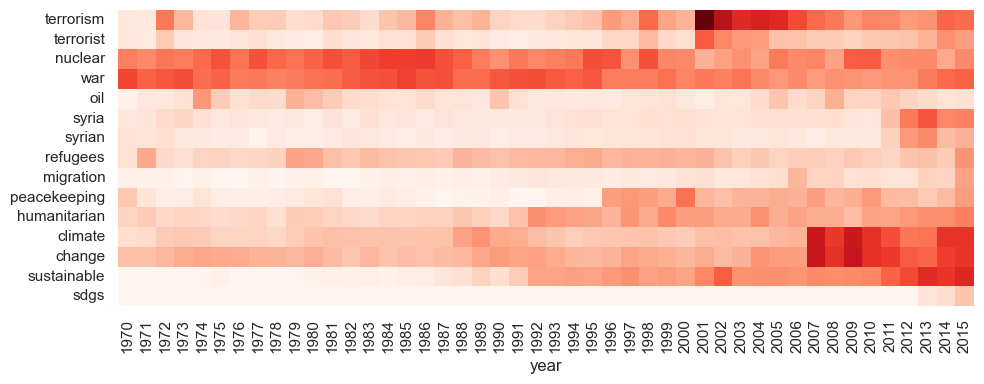

In [110]:
plt.figure(figsize=(10, 4))
sns.set(font_scale=1)
sns.heatmap(
    data=freq_df.T, 
    xticklabels=True, 
    yticklabels=True, 
    cbar=False, 
    cmap="Reds"
)
sns.set(font_scale=1)
plt.tight_layout()